In [22]:
import torch
import torchvision
from torch import nn
from torchvision import transforms

In [23]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Transformaciones: convertir a tensor y normalizar imágenes

In [24]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

# Carga del dataset MNIST

In [25]:
train_dataset=torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset=torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Crear los dataloaders

In [26]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Definir la arquitectura del MLP con Relu

In [27]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.model=nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,10),
        )
    def forward(self,x):
        x=x.view(-1,28*28)
        return self.model(x)

# Instanciar el modelo y moverlo a GPU si está disponible

In [28]:
model=MLP().to(device)

# Definir la función de pérdida y el optimizador

In [29]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# Entrenar el modelo

In [33]:
num_epochs=10
train_losses=[]
test_accuracies=[]

for epoch in range(num_epochs):
    model.train()
    running_loss=0.0
    for images, labels in train_loader:
        images,labels=images.to(device),labels.to(device)
        outputs=model(images)
        loss=criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    train_losses.append(running_loss/len(train_loader))
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        for images, labels in test_loader:
            images,labels=images.to(device),labels.to(device)
            outputs=model(images)
            _,predicted=torch.max(outputs,1)
            total+=labels.size(0)
            correct+=predicted.eq(labels).sum().item() #este elemento
    accuracy=correct/total
    test_accuracies.append(accuracy)
    print(f"Época [{epoch+1}/{num_epochs}], Perdida: {train_losses[-1]:.4f}, Precisión en prueba:{accuracy:.4f} ")


Época [1/10], Perdida: 0.0772, Precisión en prueba:0.9774 
Época [2/10], Perdida: 0.0773, Precisión en prueba:0.9743 
Época [3/10], Perdida: 0.0710, Precisión en prueba:0.9775 
Época [4/10], Perdida: 0.0700, Precisión en prueba:0.9743 
Época [5/10], Perdida: 0.0677, Precisión en prueba:0.9779 
Época [6/10], Perdida: 0.0653, Precisión en prueba:0.9796 
Época [7/10], Perdida: 0.0643, Precisión en prueba:0.9809 
Época [8/10], Perdida: 0.0627, Precisión en prueba:0.9803 
Época [9/10], Perdida: 0.0608, Precisión en prueba:0.9806 
Época [10/10], Perdida: 0.0562, Precisión en prueba:0.9819 


In [34]:
torch.save(model.state_dict(),"model.pth")
print("Modelo guardado")

Modelo guardado


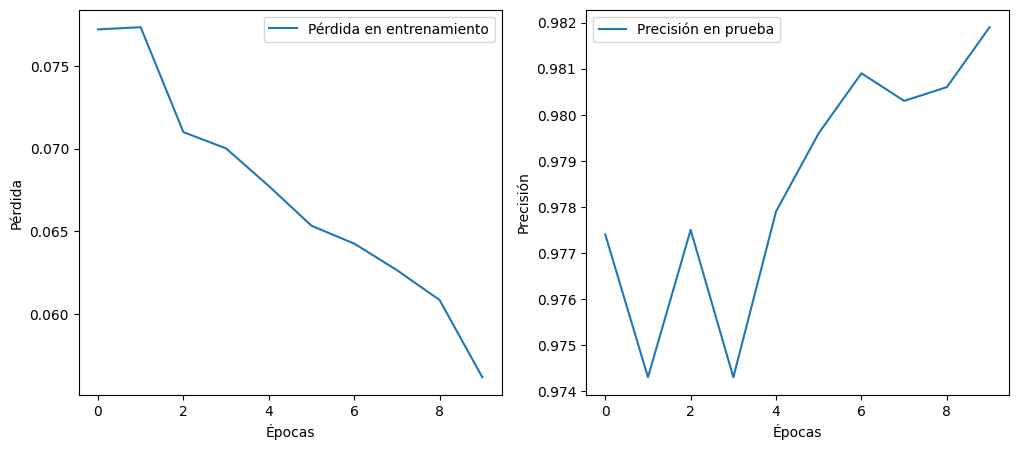

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Pérdida en entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label="Precisión en prueba")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.show()